Load Modules / Initial Setup

In [1]:
import numpy as np, plottools as pl, binning as bins, prjlib
from matplotlib.pyplot import *

In [2]:
# define parameters, etc
ps, __ = prjlib.filename_init(doreal='False',rlmin='200',stype='lcmb',ver='v1')
pd, __ = prjlib.filename_init(doreal='False',rlmin='200',stype='dust')
Lmin = 20
mb = bins.multipole_binning(10,spc='p2',lmin=Lmin,lmax=2048)

In [3]:
# Load sim cl, RDN0, etc
num = 20
scb = prjlib.binned_cl_rlz(ps.quad.f['EB'].cl,1,200,mb)
dcb = prjlib.binned_cl_rlz(pd.quad.f['EB'].cl,1,num,mb)
vcb = np.std(scb,axis=0)
rds = prjlib.binned_cl_rlz(ps.quad.f['EB'].rdn0,1,num,mb)
rdd = prjlib.binned_cl_rlz(pd.quad.f['EB'].rdn0,1,num,mb)

RDN0 subtraction

In [4]:
# N.B. for dust sim, we use the standard sim of <RDN0> for the N0-bias estimate, and the difference does not contain this.  
dob = dcb - rdd
sob = scb[:num,:]-rds

Plot Figures

<ErrorbarContainer object of 3 artists>

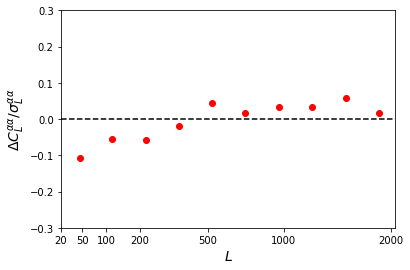

In [5]:
# main plot
pl.plot_1dstyle(frac=True,ylabloc=[-0.1,0.5],spc='p2',ylab=r'$\Delta C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$',xmin=Lmin,ymin=-.3,ymax=.3)
errorbar(np.sqrt(mb.bc),np.mean(dob-sob,axis=0)/vcb,color='r',fmt='o',lw=2)
#savefig('fig_dust.eps')

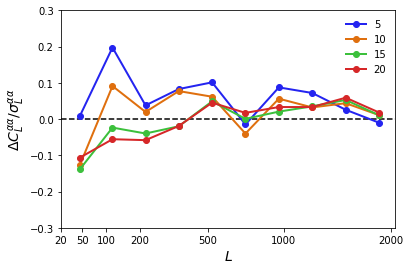

In [6]:
# check rlz dependence
pl.plot_1dstyle(frac=True,ylabloc=[-0.1,0.5],spc='p2',ylab=r'$\Delta C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$',xmin=Lmin,ymin=-.3,ymax=.3)
for imax in [5,10,15,20]:
    errorbar(np.sqrt(mb.bc),np.mean(dob[:imax,:]-sob[:imax,:],axis=0)/vcb,fmt='o-',label=str(imax),lw=2)
legend(loc=0,frameon=False)

<ErrorbarContainer object of 3 artists>

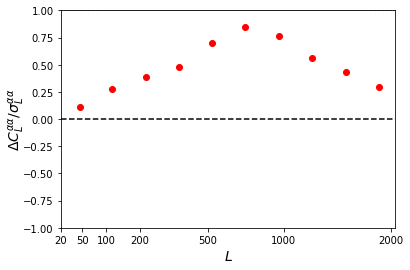

In [7]:
# for N0 correction case
pl.plot_1dstyle(frac=True,ylabloc=[-0.1,0.5],spc='p2',ylab=r'$\Delta C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$',xmin=Lmin,ymin=-1,ymax=1)
errorbar(np.sqrt(mb.bc),np.mean(dcb-scb[:20,:],axis=0)/vcb,color='r',fmt='o',lw=2)